In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset 
# Website URL: https://open.toronto.ca/dataset/outbreaks-in-toronto-healthcare-institutions/
# Unable to link the dataset directly to this specific file on the website using its URL & hence downloaded locally (file name:ob_report_2024.csv)

df = pd.read_csv('/Users/victorleung/visualization/02_activities/assignments/ob_report_2024.csv') 

# Convert date columns to datetime format
df['Start date of outbreak'] = pd.to_datetime(df['Date Outbreak Began'])
df['End date of outbreak'] = pd.to_datetime(df['Date Declared Over'])

# Calculate the duration of the outbreak (in days)
df['Outbreak Duration'] = (df['End date of outbreak'] - df['Start date of outbreak']).dt.days

df


,_id,Institution Name,Institution Address,Outbreak Setting,Type of Outbreak,Causative Agent-1,Causative Agent-2,Date Outbreak Began,Date Declared Over,Active,Start date of outbreak,End date of outbreak,Outbreak Duration
0,1,Scarborough Health Network - Birchmount Hospit...,3030 Birchmount Rd,Hospital-Chronic Care,Respiratory,Influenza A (Not subtyped),NaN,2024-12-31,2025-01-09,N,2024-12-31,2025-01-09,9
1,2,Baycrest Hospital - H7E,3560 Bathurst St,Hospital-Chronic Care,Respiratory,COVID-19,NaN,2024-12-31,2025-01-11,N,2024-12-31,2025-01-11,11
2,3,Villa Colombo Home for the Aged - 2 Fusco West...,40 Playfair Ave,LTCH,Respiratory,Coronavirus*,NaN,2024-12-31,2025-01-22,N,2024-12-31,2025-01-22,22
3,4,Villa Colombo Homes for the Aged - 3 Fusco South,40 Playfair Ave,LTCH,Respiratory,Respiratory syncytial virus,NaN,2024-12-31,2025-01-06,N,2024-12-31,2025-01-06,6
4,5,"Chartwell Scarlett Heights - 3rd, 7th & 8th Fl",4005 Eglinton Ave W,Retirement Home,Respiratory,COVID-19,NaN,2024-12-31,2025-01-10,N,2024-12-31,2025-01-10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1027,The Jewish Home for the Aged - 2GS,3560 Bathurst St,LTCH,Respiratory,COVID-19,NaN,2024-01-02,2024-01-15,N,2024-01-02,2024-01-15,13
1027,1028,Baycrest Hospital - H5W,3560 Bathurst St,Hospital-Chronic Care,Respiratory,COVID-19,NaN,2024-01-02,2024-01-10,N,2024-01-02,2024-01-10,8
1028,1029,Extendicare Bayview - East Unit,550 Cummer Ave,LTCH,Respiratory,Influenza A (Not subtyped),NaN,2024-01-02,2024-01-04,N,2024-01-02,2024-01-04,2
1029,1030,West Park Healthcare Centre - 2EC,82 Buttonwood Ave,Hospital-Chronic Care,Respiratory,COVID-19,NaN,2024-01-02,2024-01-09,N,2024-01-02,2024-01-09,7


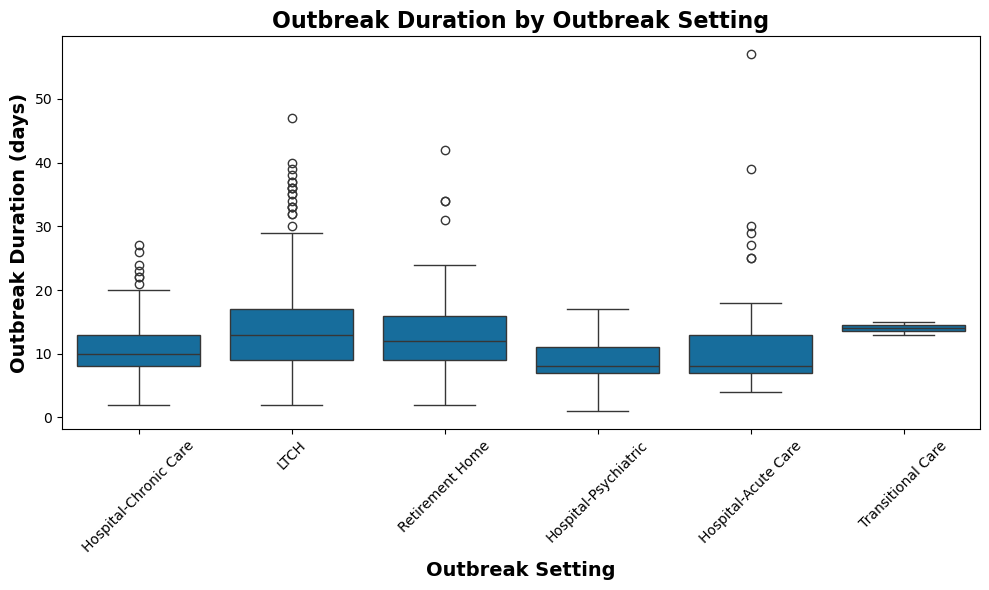

In [12]:
## Increase font size & bold fonts of plot & axis titles

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outbreak Setting', y='Outbreak Duration', data=df)

# Set Seaborn's color palette to be more colorblind-friendly
sns.set_palette("colorblind")

# Set the title with bold font and increased font size
plt.title('Outbreak Duration by Outbreak Setting', fontsize=16, fontweight='bold')

# Set the axis labels with bold font and increased font size
plt.xlabel('Outbreak Setting', fontsize=14, fontweight='bold')
plt.ylabel('Outbreak Duration (days)', fontsize=14, fontweight='bold')

# Rotate the x-ticks and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<Figure size 1200x600 with 0 Axes>

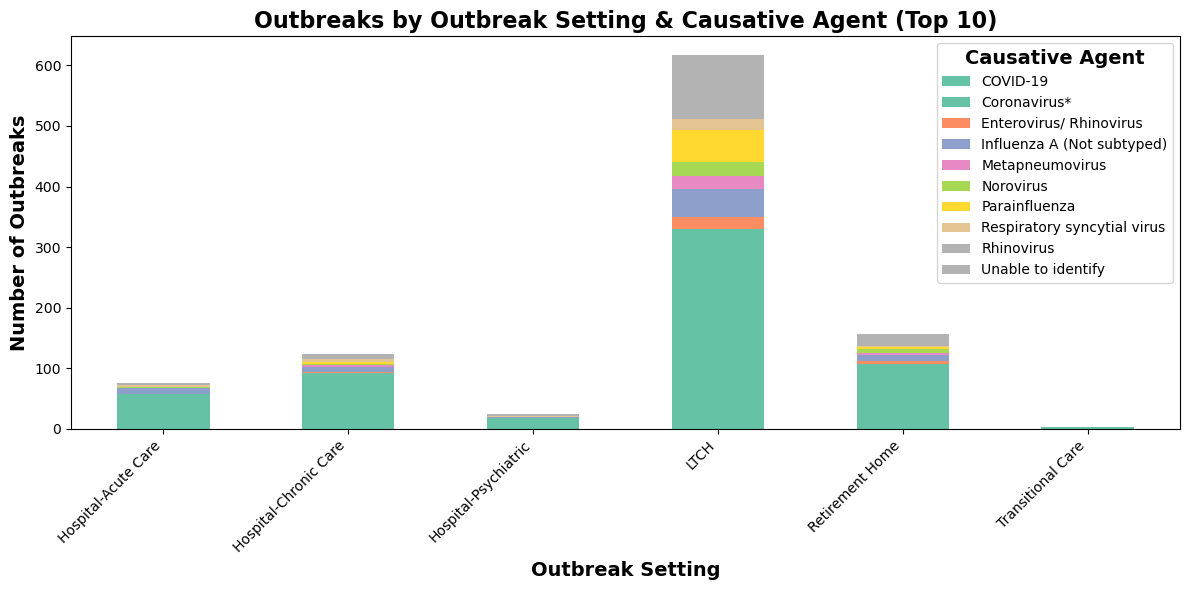

In [13]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Get the top 10 most frequent causative agents
top_10_pathogens = df['Causative Agent-1'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 causative agents
df_top_10 = df[df['Causative Agent-1'].isin(top_10_pathogens)]

# Group by 'Outbreak Setting' and 'Causative Agent-1', count the outbreaks, and filter by top 10 causative agents
outbreaks_by_facility_and_agent = df_top_10.groupby(['Outbreak Setting', 'Causative Agent-1']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = outbreaks_by_facility_and_agent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Set the title and labels with increased font size and bold text
plt.title('Outbreaks by Outbreak Setting & Causative Agent (Top 10)', fontsize=16, fontweight='bold')   # Title
plt.xlabel('Outbreak Setting', fontsize=14, fontweight='bold')                                          # x-axis label
plt.ylabel('Number of Outbreaks', fontsize=14, fontweight='bold')                                       # y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Access the legend object and modify its title font size and weight
legend = ax.legend()                        # Retrieve the legend object
legend.set_title('Causative Agent')         # Set the legend title text
legend.get_title().set_fontsize(14)         # Set font size of legend title
legend.get_title().set_fontweight('bold')   # Set font weight of legend title

# Adjust layout to prevent clipping of legend and labels
plt.tight_layout()

plt.show()


